In [12]:
# load some key packages:
import numpy as np                # a numerical package
import pandas as pd               # a data analysis package
import matplotlib.pyplot as plt   # a scientific plotting package

# to display the plots in the same document
%matplotlib inline

In [15]:
# %%timeit
import xarray as xr

# from THREDDS server. 
data_url = 'http://thredds.northwestknowledge.net:8080/thredds/ncss/grid/MET/pr/pr_2016.nc/dataset.html'

# open the file and assign it the name: ds
ds = xr.open_dataset(data_url)

# check it out
# print(ds)

variable = 'relative_humidity'

# check it out
print(ds[variable])

RuntimeError: NetCDF: DAP server error

In [3]:
# choose a date period (such as a month)
a_month = ds[variable].sel(day='2016-01')

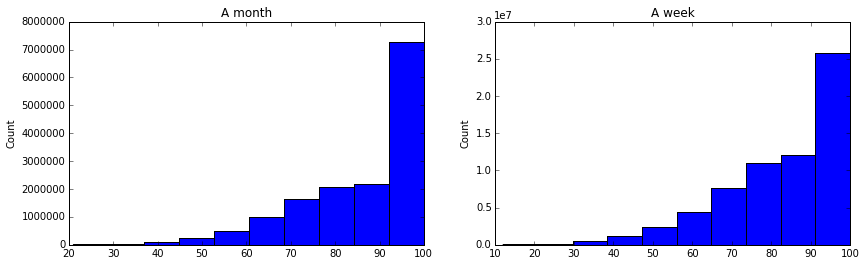

In [4]:
# or grab the range between two specific days
a_week =  ds[variable].sel(day=slice('2016-01-01', '2016-05-14'))

# Create a figure with two subplots 
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14,4))

# plot the month of data in the first subplot
a_month.plot(ax=axes[0])
axes[0].set_title('A month')

# plot the week of data in the first subplot
a_week.plot(ax=axes[1])
axes[1].set_title('A week')

In [5]:
df = ds[variable].to_pandas()

In [6]:
# convert to a pandas object and then to a dataframe
df = df.to_frame()

# get a summary of the data including the percentiles listed
df.describe(percentiles=[.1,.25,.5,.75,.9])

,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,...,2016-07-04 00:00:00,2016-07-05 00:00:00,2016-07-06 00:00:00,2016-07-07 00:00:00,2016-07-08 00:00:00,2016-07-09 00:00:00,2016-07-10 00:00:00,2016-07-11 00:00:00,2016-07-12 00:00:00,2016-07-13 00:00:00
count,483879.000000,483879.000000,483879.000000,483879.000000,483879.000000,483879.000000,483879.000000,483879.000000,483879.000000,483879.000000,...,483879.000000,483879.000000,483879.000000,483879.000000,483879.000000,483879.000000,483879.000000,483879.000000,483879.000000,483879.000000
mean,84.424088,80.752115,83.954942,84.290710,87.544900,89.188845,91.739205,90.150293,89.487897,89.702771,...,81.688059,79.511422,80.139974,82.048232,82.826764,81.937699,81.923990,78.730588,77.077939,76.565471
std,14.142915,15.056235,13.534938,14.355831,14.916566,13.050707,9.739124,10.134173,11.352614,11.627086,...,18.332357,20.606358,21.437360,20.406709,18.583433,19.188042,19.905715,23.918213,23.547481,23.953465
min,28.724262,26.328606,26.048372,34.213352,34.041252,42.159359,44.430729,46.332024,34.251812,33.214199,...,17.536636,13.386902,12.606256,11.749550,16.798618,17.174082,15.705759,8.339179,8.423068,9.378815
10%,66.144243,61.428989,66.090755,64.237392,64.706256,67.961734,77.145961,75.271274,72.674959,72.321706,...,54.991611,49.513027,46.744593,49.154095,53.433147,53.121770,50.248145,39.222398,41.355186,39.053892
25%,74.076061,69.110668,74.702812,72.243988,77.608780,80.530495,85.035690,83.327213,81.930531,81.540142,...,67.171654,63.491173,64.798882,69.165585,71.995678,70.335522,70.216980,62.883554,59.094278,59.711721
50%,85.334511,80.829865,84.270126,86.330101,93.993973,95.223839,95.730461,92.001297,92.556847,93.601532,...,87.885719,85.897835,89.454971,90.263199,89.222351,88.250389,89.815056,87.648819,82.287964,81.376137
75%,100.000000,95.480564,98.875107,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,99.889904,100.000000,98.919476,100.000000,98.275105,98.848362,98.537380,100.000000,100.000000,100.000000
90%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [9]:
plt.plot(df[1,], df[2,])

TypeError: Cannot convert input to Timestamp

In [10]:
df[1:3]

day                    2016-01-01  2016-01-02  2016-01-03  2016-01-04  \
lon         lat                                                         
-124.772163 48.354356         100         100         100         100   
            48.312689         100         100         100         100   

day                    2016-01-05  2016-01-06  2016-01-07  2016-01-08  \
lon         lat                                                         
-124.772163 48.354356         100         100         100         100   
            48.312689         100         100         100         100   

day                    2016-01-09  2016-01-10     ...      2016-07-04  \
lon         lat                                   ...                   
-124.772163 48.354356         100   95.448341     ...       91.464783   
            48.312689         100   95.833374     ...       91.215034   

day                    2016-07-05  2016-07-06  2016-07-07  2016-07-08  \
lon         lat                                                         
-124.772163 48.354356   94.075851   99.986618         100         100   
            48.312689   94.062126  100.000000         100         100   

day                    2016-07-09  2016-07-10  2016-07-11  2016-07-12  \
lon         lat                                                         
-124.772163 48.354356   89.941528         100         100   96.638489   
            48.312689   89.441139         100         100   96.780273   

day                    2016-07-13  
lon         lat                    
-124.772163 48.354356   95.647484  
            48.312689   96.079475  

[2 rows x 195 columns]

In [11]:
# create a box plot
df.boxplot(column=variable, by=df.index.month, whis= [10, 90], sym='')

# set the labels
plt.xlabel('day')
plt.ylabel('Max Relative Humidity [C]')
plt.title('Daily boxplots')
plt.suptitle('')

plt.show()

AttributeError: 'MultiIndex' object has no attribute 'month'

In [62]:
df

day                    2016-01-01  2016-01-02  2016-01-03  2016-01-04  \
lon         lat                                                         
-124.772163 48.396023  100.000000  100.000000  100.000000  100.000000   
            48.354356  100.000000  100.000000  100.000000  100.000000   
            48.312689  100.000000  100.000000  100.000000  100.000000   
            48.187689  100.000000  100.000000  100.000000  100.000000   
            48.146023  100.000000  100.000000  100.000000  100.000000   
            48.104356  100.000000  100.000000  100.000000  100.000000   
-124.730497 48.437689  100.000000  100.000000  100.000000  100.000000   
            48.396023  100.000000  100.000000  100.000000  100.000000   
            48.354356  100.000000  100.000000  100.000000  100.000000   
            48.312689  100.000000  100.000000  100.000000  100.000000   
            48.271023  100.000000  100.000000  100.000000  100.000000   
            48.229356  100.000000  100.000000  100.000000  100.000000   
            48.187689  100.000000  100.000000  100.000000  100.000000   
            48.146023  100.000000  100.000000  100.000000  100.000000   
            48.104356  100.000000  100.000000  100.000000  100.000000   
            48.062689  100.000000  100.000000  100.000000  100.000000   
            48.021023  100.000000  100.000000  100.000000  100.000000   
            47.979356  100.000000  100.000000  100.000000  100.000000   
            47.937689  100.000000  100.000000  100.000000  100.000000   
-124.688830 48.437689  100.000000  100.000000  100.000000  100.000000   
            48.396023  100.000000  100.000000  100.000000  100.000000   
            48.354356  100.000000  100.000000  100.000000  100.000000   
            48.312689  100.000000  100.000000  100.000000  100.000000   
            48.271023  100.000000  100.000000  100.000000  100.000000   
            48.229356  100.000000  100.000000  100.000000  100.000000   
            48.187689  100.000000  100.000000  100.000000  100.000000   
            48.146023  100.000000  100.000000  100.000000  100.000000   
            48.104356  100.000000  100.000000  100.000000  100.000000   
            48.062689  100.000000  100.000000  100.000000  100.000000   
            48.021023  100.000000  100.000000  100.000000  100.000000   
...                           ...         ...         ...         ...   
-67.147163  44.937689   87.478348   89.274765   84.643127   72.383568   
            44.896023   85.894882   85.265594   82.495895   71.193237   
            44.854356   86.540558   81.099442   81.589500   70.039764   
            44.812689   89.490440   78.758377   81.708260   69.622063   
            44.771023   96.134163   77.405609   84.214500   71.825256   
            44.729356  100.000000   75.752525   85.168678   72.726196   
            44.687689  100.000000   75.566879   84.640396   72.360359   
            44.646023   96.790756   73.975220   81.586769   69.070580   
-67.105497  45.104356   86.600616  100.000000  100.000000   89.845352   
            45.062689   86.869537  100.000000   90.137474   74.817459   
            45.021023   88.087166   99.578201   88.472107   73.919250   
            44.979356   87.658539   96.689743   86.743950   72.425880   
            44.937689   85.665558   92.372070   84.873825   71.231461   
            44.896023   85.646446   88.395668   83.777687   70.864258   
            44.854356   87.534317   83.366798   82.484978   70.213127   
            44.812689   91.801476   78.919449   82.882210   70.891563   
            44.771023   96.778473   76.850029   84.475227   71.948112   
            44.729356   97.627533   75.603729   83.170235   70.621277   
            44.687689   93.687988   73.894684   80.208061   68.703377   
            44.646023   94.371880   72.743942   80.728149   68.717026   
-67.063830  45.062689   85.991806  100.000000  100.000000   89.845352   
            45.021023   86.862709   95.296021   86.940514 

In [17]:
import simplekml
import netCDF4
import urllib2
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

In [29]:
fhtml = 'http://thredds.northwestknowledge.net:8080/thredds/catalog/MET/pr/catalog.html'
file = urllib2.urlopen(fhtml)
data = file.read()
soup = BeautifulSoup(data)
 
# loop over the contents of the array
t = []
for link in soup.find_all('a'):
    aref = link.get('href')
    if aref.find('catalog.html?dataset=REACCHDatasetScan_pr/pr_2016.nc') != -1:
        if aref.find('.nc') != -1:
            daynum = aref.split('_day_')[1].replace('.nc','')
            adate = datetime(1989,1,1)+(int(daynum)-1)*timedelta(hours=24)
            anc = aref.replace('catalog.html?dataset=REACCHDatasetScan_pr/pr_2016.nc','http://thredds.northwestknowledge.thredds/catalog/MET/wms/opendap/')
            t.append([adate,anc])
# sort the array
t.sort()

IndexError: list index out of range

In [26]:
# take the first netCDF and extract geografic extent from it
 
anc = t[0][1].replace('/wms/','/dodsC/')
ds = netCDF4.Dataset(anc)
latarr = ds.variables["lat"][:]
lonarr = ds.variables["lon"][:]
ds.close()
 
# create the kml
kml = simplekml.Kml()
doc = kml.newfolder(name = 'GRIDMET precipitation')
for i in range(len(t)):
    overlay = doc.newgroundoverlay(name="growth at{date}".format(date=t[i][0].isoformat()))
    alink = t[i][1]
    aref = '{anc}?VERSION=1.1.1&REQUEST=GetMap&bbox={lonmin},{latmin},{lonmax},{latmax}&SRS=EPSG%3A4326&WIDTH=512&HEIGHT=512&LAYERS=Band1&STYLES=boxfill/sst_36&TRANSPARENT=TRUE&FORMAT=image/gif&COLORSCALERANGE=-0.1,0.2'.format(anc=alink,lonmin=str(lonarr.min()),latmin=str(latarr.min()),lonmax=str(lonarr.max()),latmax=str(latarr.max()))
    overlay.icon.href = aref
    overlay.latlonbox.west = lonarr.min()
    overlay.latlonbox.south = latarr.min()
    overlay.latlonbox.east = lonarr.max()
    overlay.latlonbox.north = latarr.max()
    overlay.icon.refreshmode ='onStop'
    overlay.icon.viewboundscale = 0.75
    overlay.timestamp = simplekml.TimeStamp(t[i][0].isoformat()+'Z')
 
#save the kml
kml.save(r'/nethome/erichs/GrowthOfPlaice.kml')

IndexError: list index out of range